In [1]:
'''PROFILE
Nama : Wahid Rochman Nugroho
'''
#importing libraries for optimizer and image data generator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#download the data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-09-11 19:33:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.69MB/s    in 56s     

2020-09-11 19:34:35 (5.45 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [21]:
#checking tmp folder
import os

os.listdir('/tmp')
#file has been downloaded

['rps_image_data', 'rockpaperscissors.zip']

In [22]:
#extracting the file rockpaperscrissors.zip
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
#extracting rockpaperscissors.zip data rekursif?
zip_ref = zipfile.ZipFile(local_zip, 'r')
#extrac to folder /tmp/rps_image_data
zip_ref.extractall('/tmp/rps_image_data')
zip_ref.close()

os.listdir('/tmp/rps_image_data')

['rockpaperscissors', '__MACOSX']

In [28]:
base_dir = '/tmp/rps_image_data/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [30]:
#split the data into validation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.4
)

In [31]:
#set train and validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [32]:
#creating the models with CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])



In [33]:
#compiling with 3 ouput (categorical)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [34]:
model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 23s - loss: 1.0637 - accuracy: 0.5292 - val_loss: 0.6962 - val_accuracy: 0.7578
Epoch 2/20
32/32 - 19s - loss: 0.6160 - accuracy: 0.7465 - val_loss: 0.4075 - val_accuracy: 0.8711
Epoch 3/20
32/32 - 19s - loss: 0.3467 - accuracy: 0.8632 - val_loss: 0.2599 - val_accuracy: 0.9023
Epoch 4/20
32/32 - 19s - loss: 0.2074 - accuracy: 0.9316 - val_loss: 0.1632 - val_accuracy: 0.9297
Epoch 5/20
32/32 - 19s - loss: 0.1865 - accuracy: 0.9306 - val_loss: 0.2055 - val_accuracy: 0.9219
Epoch 6/20
32/32 - 19s - loss: 0.1655 - accuracy: 0.9396 - val_loss: 0.1973 - val_accuracy: 0.9414
Epoch 7/20
32/32 - 19s - loss: 0.2762 - accuracy: 0.9014 - val_loss: 0.2231 - val_accuracy: 0.9180
Epoch 8/20
32/32 - 19s - loss: 0.1355 - accuracy: 0.9629 - val_loss: 0.1686 - val_accuracy: 0.9336
Epoch 9/20
32/32 - 19s - loss: 0.1299 - accuracy: 0.9588 - val_loss: 0.1459 - val_accuracy: 0.9492
Epoch 10/20
32/32 - 19s - loss: 0.1244 - accuracy: 0.9537 - val_loss: 0.1458 - val_accuracy: 0.9414
Epoch 11/

Saving 20200912_031427.jpg to 20200912_031427 (1).jpg
20200912_031427.jpg
paper


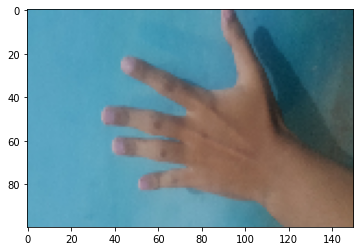

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # Predict the image
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')